<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 - Tipología y ciclo de vida de los datos aula 1 · Práctica 1</p>
<p style="margin: 0; text-align:right;">2018 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right;">Prof. Colaboradora: <b>Mireia Calvo Gonzalez</b></p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Alumno: <b>Fernando Antonio Barbeiro Campos</b> - <a href="">fbarbeiro@uoc.edu</a></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>
<center><h1>Práctica 2 - Limpieza y validación de los datos</h1></center>


# Contenidos

1. [Dataset](#data1)

2. [Integración y selección de los datos de interés a analizar.](#data2)

3. [Limpieza de los datos.](#data3)
    
    3.1. [¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?](#data31)
    
    3.2. [Identificación y tratamiento de valores extremos.](#data32)
    
    
4. [Análisis de los datos.](#data4)

    4.1. [Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).](#data41)
    
    4.2. [Comprobación de la normalidad y homogeneidad de la varianza.](#data42)
    
    4.3. [Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc.](#data43)
    
    
5. [Representación de los resultados a partir de tablas y gráficas.](#data5)

6. [Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?](#data6)

7. [Código](#data7)

## 1. Dataset <a name="data1"></a>
*Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?*

He elegido el dataset ["**Titanic: Machine Learning from Disaster**" de Kagle](https://www.kaggle.com/c/titanic/overview). 
<img src="titanic.jpg" alt="Titanic" style="width: 700px;"/>
<center>Figura 1: Titanic</center>
<p></p>
La información presente en el dataset són datos sobre cada pasajero del famoso naufragio, si la persona sobrevivió o no, su sexo, tipo de cabina que estaba, entre otros.

Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

Justamente, el problema que buscamos a contestar es precisamente esto: hacer el análisis de **¿qué tipos de personas podrían sobrevivir?**


Aún hablando un poco sobre el dataset, vamos a mirar un poco más de información sobre el mismo:

In [2]:
# Objetivo: Asegurar que estamos trabajando con el formato en ingles separado por comas
L <- readLines("train.csv", n = 1)
if (grepl(",", L)) print("File has an English format")

[1] "File has an English format"


In [3]:
# Como estamos trabajando con ficheros separados por commas, vamos a mirar un poco de datos
df <- read.csv("train.csv")
head(df)

# Mirando los nombres de columnas del dataframe y los tipos de variables y informacion adicional
print(paste("We are evaluating", nrow(df), "rows of code"))
print("Column's names: ")
colnames(df)
sapply(df,class)
str(df)
summary(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


[1] "We are evaluating 891 rows of code"
[1] "Column's names: "


[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

PassengerId    Survived      Pclass        Name         Sex         Age 
  "integer"   "integer"   "integer"    "factor"    "factor"   "numeric" 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
  "integer"   "integer"    "factor"   "numeric"    "factor"    "factor"

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

## 2. Integración y selección de los datos de interés a analizar<a name="data2"></a>


Dando un poco más de contexto en la selección de variables: debemos escoger un grupo de variables originales (también llamadas características o atributos desde el mundo del machine learning) que contenga la mayor parte de la información relevante para resolver el problema a tratar. Existen muchas metodologías y es un campo de investigación muy importante [1] *(Stanczyk y Jain, 2014)*.

Dado el contexto, queda claro que podemos aquí reducir un poco la dimensionalidad en el ámbito de atributos (columnas) porque hay variables en las cuales detectamos que no aportan mucho para el tipo de conocimiento que necesitamos recolectar. Por ejemplo:
 - el número del *ticket* de cada persona es bastante irrelevante para extraer un modelo y predecir si la persona ha sobrevivido o no
 - *Embarked* - el puerto donde ha embarcado una persona en el navio tampoco
 - *Cabin* - hay inumeros registros en la columna que no estan rellenados
 - *Fare* - es un campo que esta completamente asociado a la clase (o sea Pclass), por lo tanto, omitirlo no debe añadir problemas.

Ahora que tenemos un poco más de información sobre el dataset, con el intuito de obtener un modelo significativo, he elegido los siguientes atributos para el análisis:
- *Survived*
- *Pclass*
- *Name*
- *Sex*
- *Age*

Queda claro que el atributo **Name** tampoco es relevante, pero mantuve por si acaso necesito explicar o hacer alguna comparación de pasajeros (será más sencillo identificar las personas por sus nombres). 


Definidos los atributos, antes de seguir para el próximo ejercicio, hago la selección de los datos que vamos a trabajar abajo.

In [4]:
df <- df[,2:6] 
head(df)

Survived,Pclass,Name,Sex,Age
0,3,"Braund, Mr. Owen Harris",male,22
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38
1,3,"Heikkinen, Miss. Laina",female,26
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35
0,3,"Allen, Mr. William Henry",male,35
0,3,"Moran, Mr. James",male,NA


## 3. Limpieza de los datos<a name="data3"></a>

### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?<a name="data31"></a>

In [5]:
# Como resultado del comando abajo, podemos ver que solamente Age tiene elementos NA
unlist(lapply(df, function(x) any(is.na(x))))
              
sapply(df, function(x) sum(is.na(x)))

# Abajo comentaré las aproximaciones posibles para el escenario y la adoptada              
df_no_NA <- df[rowSums(is.na(df)) == 0,]
nrow(df_no_NA)
options(warn=-1)             
for(i in 1:ncol(df)){
  # Aquí estamos calculando un promedio basado en la información de las otras filas para los casos donde hay elemento vacío
  df[is.na(df[,i]), i] <- mean(df[,i], na.rm = TRUE)
}
options(warn=0)          
unlist(lapply(df, function(x) any(is.na(x))))
nrow(df)

Survived   Pclass     Name      Sex      Age 
   FALSE    FALSE    FALSE    FALSE     TRUE

Survived   Pclass     Name      Sex      Age 
       0        0        0        0      177

[1] 714

Survived   Pclass     Name      Sex      Age 
   FALSE    FALSE    FALSE    FALSE    FALSE

[1] 891

Como podemos notar, solamente la columna **Age** presentaba **datos vacíos**. Además, la cantidad de registros que estamos trabajando tampoco es masiva, es decir, **tenemos un muestreo pequeño de datos (891 registros)**.

Esto básicamente motiva con que no adoptaramos una aproximación posible en los casos de datos vacíos (NA):

- **Eliminación de registros (filas) donde haya a ocurrencia de NAs**

Como podemos ver en el dataset `df_no_NA`, quedamos simplemente con `714` filas para trabajar (particularmente he considerado poco), por lo tanto, **he adoptado una aproximación distinta**:
<p style="color: red">
<ul>
    <li><b style="color: red">Calcular un promedio basado en la información de las otras filas para los casos donde hubiera un elemento vacío</b>
    </li>
</ul>
</p>

Finalmente había un registro NA en la última línea del comando `head(df)` (*Moran, Mr. James*) veamos como ha quedado los datos de Age ahora:

In [5]:
head(df)

Survived,Pclass,Name,Sex,Age
0,3,"Braund, Mr. Owen Harris",male,22.00000
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000
1,3,"Heikkinen, Miss. Laina",female,26.00000
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000
0,3,"Allen, Mr. William Henry",male,35.00000
0,3,"Moran, Mr. James",male,29.69912


Por lo tanto, los valores vacios en Edad están ahora calculados con base en la media.

Para cerrar el tema de los *Missing Values*, hay otras aproximaciones que no parecían adecuadas para el escenario, sin embargo añado para dejar claro que las he tenido en cuenta:

- **Rellenar manualmente los valores que faltan**
- **Rellenar con una constante global**
- **Rellenar con un valor más probable (podría ser echo con una regresión, por ejemplo)**

Finalmente, he explicado porque no he utilizado la estrategia de eliminar los campos (por el muestreo es demasiado pequeño). Voy a explicar brevemente porque no he adoptado ninguna de las tres estrategias mencionadas arriba:
1. Rellenar los valores manualmente es un trabajo repetitivo y tedioso (hay más de 100 registros sin valores).
2. Utilizar una constante global con un valor cualquiera es lo basicamente la misma aproximación que hice, con la diferencia de que usando la media estamos aplicando una medida un poco más factible que simplemente adivinar un valor constante.
3. La opción de un valor más probable es interesante, pero exige la utilización de un algoritmo como KNN o algo del genero, siendo así una aproximación de más liosa teniendo en cuenta que los objetivos del ejercicio son más sencillos - si fuera una situación que queremos obtener muchisima precisión en el análisis, seguramente podría ser adoptada.

Con esto, queda claro que la adopción de media como valores vacios atende el *trade-off* de sencillez en su implementación y añade algunas características interesantes como la utilización de alguna medida calculada del propio dataset.

### 3.2. Identificación y tratamiento de valores extremos<a name="data32"></a>

La verdad es que, mismo antes de seguir con el análisis si hay o no valores extremos (*outliers*) queda evidente que hay pocas posibilidades de haber muchos problemas, dado que tenemos simplemente 3 columnas con valores numéricos (siendo una de ellas, la columna de **Survived** que es precisamente la columna del *label* del dataset / luego arreglaremos para ser categórica - o sea, ahí seguramente que no habrá problemas).

In [6]:
sapply(df,class)

Survived    Pclass      Name       Sex       Age 
"numeric" "numeric"  "factor"  "factor" "numeric"

[1] 80

[1] 0.42

[1]  0.42000 22.00000 29.69912 35.00000 80.00000

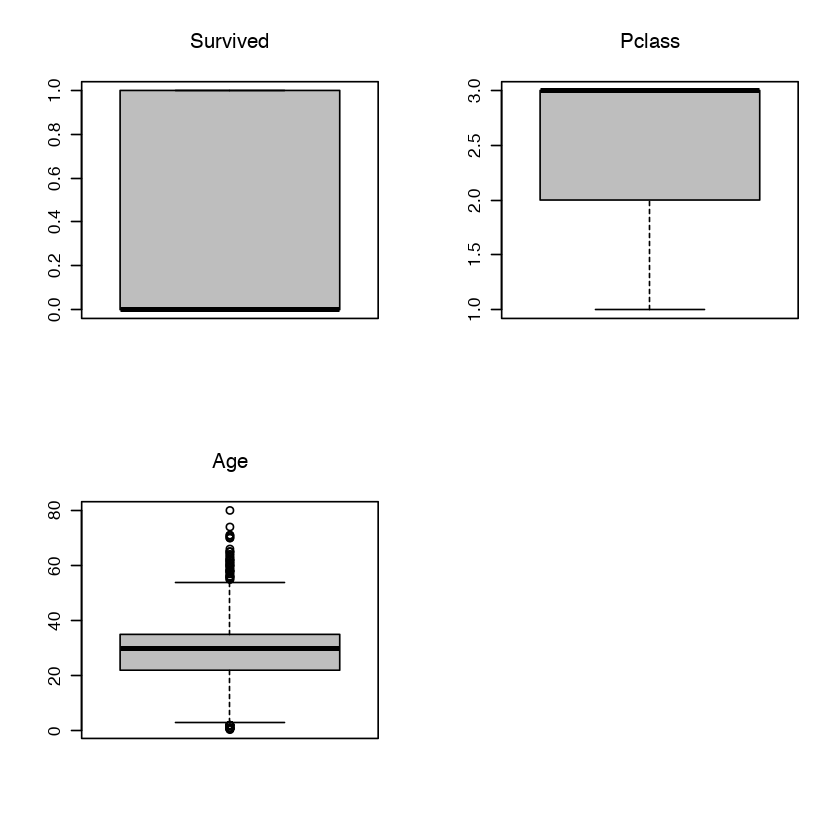

In [7]:
par(mfrow=c(2,2))
for(i in 1:ncol(df)) {
    if (is.numeric(df[,i])){
        boxplot(df[,i], main = colnames(df)[i], width = 100, col="gray")
    }
}

max(df$Age, na.rm = TRUE)
min(df$Age, na.rm = TRUE)
fivenum(df$Age)

Con esto, hay valores que aparecen en los boxplots como *outliers* en **Age**, y es completamente factible que una persona en el Titanic tuviera `80` años (y también `0.4` años, en el caso de un bebé). 

**Los outliers afectan especialmente a la media (medida poco robusta). Y cuando la muestra es pequeña como en nuestro, el efecto se nota aún más acentuado.**

Como forma de tratamiento de valores extremos, una posible aproximación es la tecnica de *Binning* (discretización) que creo ser perfecta para la columna en cuestión.

Otro punto que parece importante tratar es que **Survived** no es un valor numerico, sino un sobrevivió o no (Yes o No) por lo cual también voy a aplicar Binning en la columna.

In [9]:
df$Age <- as.factor(ifelse(df$Age >= 21, "Adult", "Underage"))
df$Survived <- as.factor(ifelse(df$Survived == 1, "Yes", "No"))
sapply(df,class)
tail(df)

Survived    Pclass      Name       Sex       Age 
 "factor" "numeric"  "factor"  "factor"  "factor"

,Survived,Pclass,Name,Sex,Age
886,No,3,"Rice, Mrs. William (Margaret Norton)",female,Adult
887,No,2,"Montvila, Rev. Juozas",male,Adult
888,Yes,1,"Graham, Miss. Margaret Edith",female,Underage
889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Adult
890,Yes,1,"Behr, Mr. Karl Howell",male,Adult
891,No,3,"Dooley, Mr. Patrick",male,Adult


Explicando el enfoque: 

Como en algunas ocasiones, la información tiene un poco de *ruido*, nos interesa reducir al máximo lo mismo y, para ello, una posible solución es discretizar. Así, una serie de valores son los representantes de la variable cuantitativa (en nuestro caso *Underage* y *Adult* son los representantes).

Otras aproximaciones y tecnicas también podrían estar empleadas aquí, como *Regression* u *Outlier Analysis*, sin embargo, la que haría más sentido para lo que buscamos es si duda el *Binning*.

## 4. Análisis de los datos<a name="data4"></a>

### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)<a name="data41"></a>

In [10]:
# Agrupación por sexo
df.male <- df[df$Sex == "male",] 
df.female <- df[df$Sex == "female",] 

# Por Edad
df.adult <- df[df$Age == "Adult",] 
df.underage <- df[df$Age == "Underage",] 

# Por Cabina
df.first_class <- df[df$Pclass == 1,] 
df.second_class <- df[df$Pclass == 2,] 
df.third_class <- df[df$Pclass == 3,]

print(paste("Hombres: ", nrow(df.male)))
print(paste("Mujeres: ", nrow(df.female)))
print("------------------------------------------------")
print(paste("Adultos: ", nrow(df.adult)))
print(paste("No adultos: ", nrow(df.underage)))
print("------------------------------------------------")
print(paste("Primera clase: ", nrow(df.first_class)))
print(paste("Segunda clase: ", nrow(df.second_class)))
print(paste("Tercera clase: ", nrow(df.third_class)))

[1] "Hombres:  577"
[1] "Mujeres:  314"
[1] "------------------------------------------------"
[1] "Adultos:  711"
[1] "No adultos:  180"
[1] "------------------------------------------------"
[1] "Primera clase:  216"
[1] "Segunda clase:  184"
[1] "Tercera clase:  491"


### 4.2. Comprobación de la normalidad y homogeneidad de la varianza<a name="data42"></a>

Honestamente, con el dataset y las informaciones que hemos elegido para trabajar (grande parte de ellas son categóricas), creo que las comprobaciones de varianza que se busca en el item 4.2 no se aplican para el escenario. Sin embargo, haré aún así algunas comprobaciones con el único atributo numérico y continuo que queda, simulando lo que se busca en el ítem.

In [11]:

# H0: la muestra (de tamaño n) sigue una distribución normal
# Se rechaza H0 si p value < alfa - ejemplo: alfa = 0.05
# Si se aplica Shapiro (en toda la muestra)

ST_P <- shapiro.test(df$Pclass)
ST_P

pvalue_P <- ST_P[[2]]
pvalue_P


	Shapiro-Wilk normality test

data:  df$Pclass
W = 0.71833, p-value < 2.2e-16


[1] 3.393031e-36

En el test de Shapiro-Wilk, cuando P r(D) ≥ α entonces se acepta la hipótesis nula, existe
normalidad. El valor p del test de Shapiro ha dado para Pclass 3.39. Por tanto, no se rechaza la hipótesis nula de normalidad. Asumimos que la muestra sigue una distribución normal.

### 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc.<a name="data43"></a>

In [22]:
# Obtain train set (80%) and test set (20%)
lines  <- nrow(df)

ntrain <- round(lines * 0.8)      # number of training examples
tindex <- sample(lines, ntrain)   # indices of training samples (random)
xtrain <- df[tindex,2:5]          # data are in columns 2:6 - "Pclass", "Sex", "Age" (nombre va a ser eliminado abajo)
xtest  <- df[-tindex,2:5]         # data are in columns 2:6 - "Pclass", "Sex", "Age" (nombre va a ser eliminado abajo)
ytrain <- df[tindex,1]            # labels are in column 4 - "SURVIVED"
ytest  <- df[-tindex,1]           # labels are in column 4 - "SURVIVED"

xtrain$Name <- NULL
xtest$Name <- NULL

summary(xtrain)
summary(xtest)

model_titanic <- C50::C5.0(xtrain, ytrain)
summary(model_titanic)

     Pclass          Sex            Age     
 Min.   :1.000   female:255   Adult   :568  
 1st Qu.:2.000   male  :458   Underage:145  
 Median :3.000                              
 Mean   :2.331                              
 3rd Qu.:3.000                              
 Max.   :3.000                              

     Pclass          Sex            Age     
 Min.   :1.000   female: 59   Adult   :143  
 1st Qu.:1.000   male  :119   Underage: 35  
 Median :3.000                              
 Mean   :2.219                              
 3rd Qu.:3.000                              
 Max.   :3.000                              


Call:
C5.0.default(x = xtrain, y = ytrain)


C5.0 [Release 2.07 GPL Edition]  	Sat Dec 29 20:12:48 2018
-------------------------------

Class specified by attribute `outcome'

Read 713 cases (4 attributes) from undefined.data

Decision tree:

Sex = female: Yes (255/67)
Sex = male: No (458/82)


Evaluation on training data (713 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2  149(20.9%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   376    67    (a): class No
	    82   188    (b): class Yes


	Attribute usage:

	100.00%	Sex


Time: 0.0 secs


## 5. Representación de los resultados a partir de tablas y gráficas<a name="data5"></a>

[1] "La accuracy del modelo es:  0.769662921348315"
[1] "El error del modelo es:  0.230337078651685"



Call:
C5.0.formula(formula = ytrain ~ ., data = xtrain, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sat Dec 29 20:17:55 2018
-------------------------------

Class specified by attribute `outcome'

Read 713 cases (4 attributes) from undefined.data

Rules:

Rule 1: (458/82, lift 1.3)
	Sex = male
	->  class No  [0.820]

Rule 2: (255/67, lift 1.9)
	Sex = female
	->  class Yes  [0.735]

Default class: No


Evaluation on training data (713 cases):

	        Rules     
	  ----------------
	    No      Errors

	     2  149(20.9%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   376    67    (a): class No
	    82   188    (b): class Yes


	Attribute usage:

	100.00%	Sex


Time: 0.0 secs


id="See5/C5.0 2.07 GPL Edition 2018-12-29"
entries="1"
rules="2" default="No"
conds="1" cover="458" ok="376" lift="1.31907" class="No"
type="1" att="Sex" val="male"
conds="1" cover="255" ok="188" lift="1.94202" class="Yes"
type="1" att="Sex" val="female"


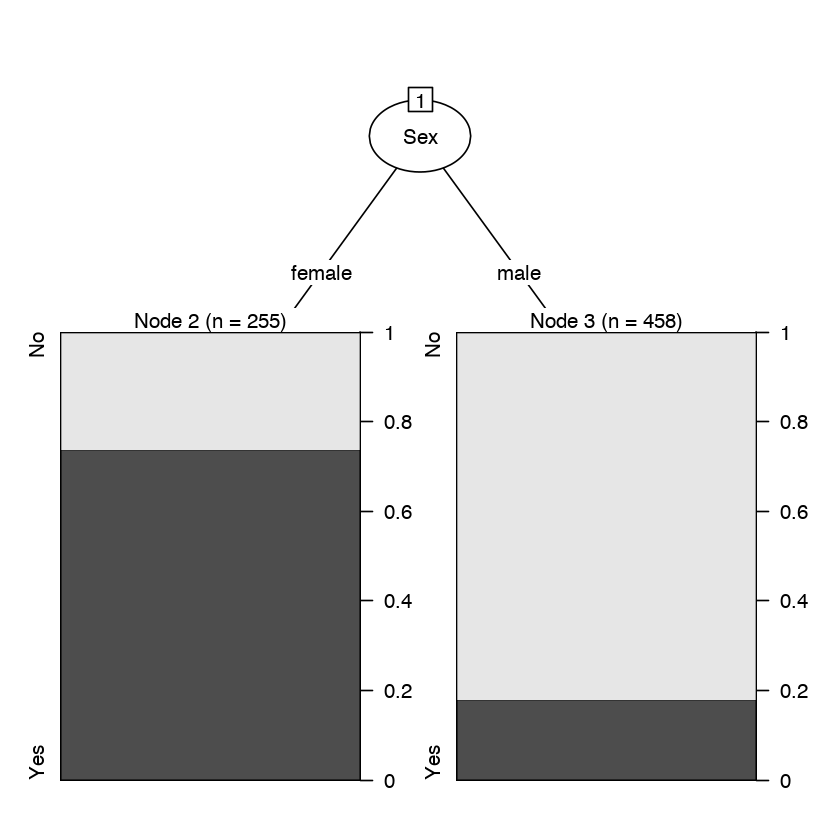

In [26]:
# MOSTRAR EL ARBOL OBTENIDO
plot(model_titanic)

estimated_ytest <- predict(model_titanic, xtest, type="class")
accuracy <- sum(ytest==estimated_ytest)/length(ytest)
error <- 1- accuracy
print(paste("La accuracy del modelo es: ", accuracy))
print(paste("El error del modelo es: ", error))

# Mirando las reglas del modelo
mod <- C50::C5.0(ytrain ~ ., data = xtrain, rules = TRUE)
summary(mod)
cat(mod$rules)

## 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?<a name="data6"></a>


Analizando nuestro gráfico de árbol, queda claro que independientemente de la clase del pasajero, si su sexo fuera "**Hombre**", su capacidad de sobrevivir era  más pequeña que de una mujer (probabilidad de los hombres como un todo alrededor de 20%).

Es importante resaltar que al elegir las variables, la variable **AGE** y **PClass** han sido pasadas como parámetro y posiblemente el paquete C50 ha procedido con un algoritmo de poda, porque siquiera las encontramos entre las variables y las reglas.

## 7. Código<a name="data7"></a>

Como he optado por hacer directamente en un Jupyter notebook, todos las partes del código estan presentes en este documento, sin embargo, en el repositorio de Github también es posible encontrar todos los archivos utilizados durante la práctica.

## Referencias

**[1] Stanczyk, U.; Jain, L. C. (2014)**. *Feature Selection for Data and Pattern Recognition*. Springer.
